In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [46]:
bird_data = pd.read_csv("bird_tracking.csv")
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
Unnamed: 0            61920 non-null int64
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


We'll get started by simply plotting the latitude and longitude of a flight
trajectory for a single bird in a standard two dimensional plot.
Latitude and longitude are coordinates along the surface of a sphere,
where a standard 2-D plot is a plane
so we would expect very strong distortions
for the flight trajectories.
This is especially true because the trajectories
cover a large spatial region.
We're doing this however, primarily to have a quick way to look at the data
and develop more intuition about it.
We'll be doing an actual cartographic projection later in this case study.
We'll proceed with plotting and we'll import our pyplot library
as plt. We'll also import NumPy as np as is usual.
One of the birds is called Eric.
Let's extract the indices, the rows of the data frame for Eric.
Bird data dot bird name.
We're looking for Eric in this data set.
I'm going to store the indices in a variable called ix.
Next we'll extract x and y-coordinates of the flight trajectories.
X and y are defined here as a tuple.
I'll first get the longitude corresponding to my index ix,
and then I'll get the latitude for the same positions.
And now we have our x and y-coordinates here.
I'm going to create a figure of whatever size is suitable,
and then we'll plot the trajectories.
X versus y, and in this case we'll be just using blue dots
to represent the flight trajectory.
Let's now look at a PDF version of this plot.
In this plot you can see the migration path that Eric has taken.
Again, the flight trajectory will be substantially distorted
because we did not implement any type of cartographic projection.
Nevertheless, we get a decent sense of the flight path.
Let's then plot the trajectories for all three birds in a single plot.
We'll be extracting the bird names using pandas unique function.
Bird data dot bird name.
And we can now look at the contents of this object.
And we have three birds Eric, Nico, and Sanne.
Our code will be essentially the same what we had before, except in this case
we have to loop over all three birds.
My main loop is going to be for bird name in bird names,
and I'll be making use of the code that we just
wrote to fill the following lines.
We'll proceed very much like before, except that when
we do find the index, instead of using Eric,
we'll be using our generic bird name.
We then extract the x and y-coordinates.
We'll move the figure establishment or figure creation at the very top.
And then we plot the flight patterns.
Once we're done we can also add labels.
Our x label is longitude.
And our y label is latitude.
Finally, we can insert a legend using plt legend
and we can specify the location of the legend.
In this case I'd like the legend to be in the lower right corner,
so location log equals lower right.
Let's try running the code.
If we'd like to keep a PDF version of this.
Before we run the code, we want to make sure
that we add the label for each plot.
And in this case, the label is bird name.
And we can now open the file.
Looking at the plot, we see that all three birds
seem to have pretty similar overall flight patterns.
However, Nico and Sanne seem to venture out further south than Eric does.
We'll be looking at these trajectories in more detail in the tasks to come.

In [47]:
# Extract the indices, the rows of the data frame for Eric
ix = bird_data.bird_name == "Eric"
x, y = bird_data.longitude[ix], bird_data.latitude[ix]

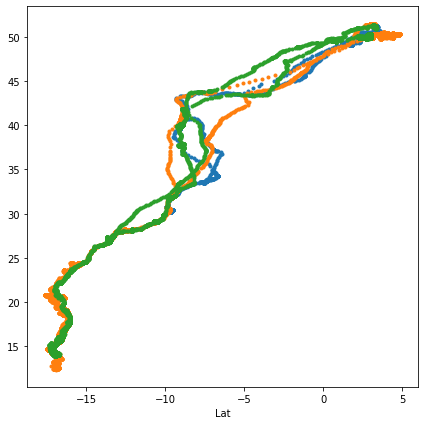

In [48]:
bird_names = pd.unique(bird_data.bird_name)
plt.figure(figsize=(7,7))


for bird_name in bird_names:
    ix = bird_data.bird_name == bird_name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    plt.plot(x, y, ".")
    
    
plt.xlabel("Long")
plt.xlabel("Lat")
plt.show()

The data also contain estimates of two dimensional speeds of the birds.
That is how fast they were flying on a 2D
plane that is a local approximation to the curved surface of the earth.
Let's look at the speed data in a little bit more detail.
In this case I'm going to work in the editor.
I use my previous line.
In this case, we'll be just looking at the data for Eric.
We'll extract the speed data.
Bird data speed underscore 2D.
And we provide the index as an input.
We can then plot a histogram of his speed.
At this point you should see a fairly cryptic error message.
That's try to debug this.
Let's first look at the contents of speed.
I'm just going to look at the first 10 entries.
These are numbers so so far everything looks good.
If I try to pull out a histogram using just the first ten observations
of speed, everything should work out.
This works, so there must be something further along in the speed array
the hist function doesn't like.
Let's see if we have something else than numbers in the array.
I'm first going to look for non-number objects.
To do that, I'll by using the isnan function from NumPy.
Looking at the output, I can see that I at least
have a few trues, meaning that I have some non-zero number of NaNs included
in my array.
A more elegant way to find out if we have any NaNs in our array
is the following.
We can take the previous line of code and use the any method to ask
if any of the output is equal to true.
The answer is true, therefore we know that there
must be at least one NaN in our array.
Let's then find out how many NaNs we exactly have in our speed array.
The NumPy isnan function returns an array
that consists of true and false, in other words
Boolean variables, Boolean objects.
We can sum over them.
And when we do the sum, a true gets interpreted as a 1 and a false
gets interpreted as 0.
In this case we have 85 entries for Eric alone that are not numeric.
This is what's causing the problem with our histogram.
Let's now include only those points those observations that
are actually numeric.
I'm first going to find the NaNs in my speed array.
I will assign the output to ind for index.
We can look at it to confirm that it's a Boolean vector.
We can then take a bitwise complement of the ind array
which turns each occurrence of true to a false and vice versa.
We can try that out.
For example, we can see that the first few elements
have been turned to true when we take the complement off the ind vector.
We're now ready to proceed with the histogram.
We first look for the isnans.
And instead of using the entire speed array for the histogram,
we'll only include those entries for which ind is not equal to true.
You can try saving the output.
And we can now take a closer look at the histogram.
Now that we have a working version, we can tweak the code a bit
and make some further adjustments.
I'm going to do the following things.
I'm going to add an x label, a y label, I
will specify the locations of the bins, and I would also
like my histogram to be normalized.
At the top here, we have our original code.
And I'm just going to copy paste my modified code in here.
In this case, I've used the x label to add an x label,
the y label function to add a y label, and I have also
specified the locations of bins using the bins keyword argument
and NumPy linspace.
In this case, the first bin starts at 0 and the last bin ends at 30.
Finally, I have normalized the y-axis, meaning
that an integral over the histogram would be equal to 1.
I can accomplish this stating the normed keyword to be equal to true.
Let me run it and we'll look at this beauty.
This is our final histogram that quantifies is how fast Eric is flying.
Pandas provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.
Let's look at how we would make the histogram using pandas.
In this case, the plotting functions are methods of data frame instances.
We're taking our bird data and we're looking
at the speed 2D, the two dimensional speed estimates for the birds.
Then we use the plot method.
As an argument, we have to specify what type of plot we would like to request.
In this case we'd like to get a histogram, so kind
of to be equal to hist.
We can also potentially specify numerous different keyword arguments.
In this case, I use the range keyword to specify the range of the histogram
to go from 0 to 30.
Let's try running the code.
I'm calling this pd_hist.pdf.
And we get an essentially identical histogram to what we had before.
The benefit of using pandas in this case was that we did not
have to deal with NaNs explicitly.
Instead, all of that happens under the hood.

/home/namur/coding/environments/python_3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


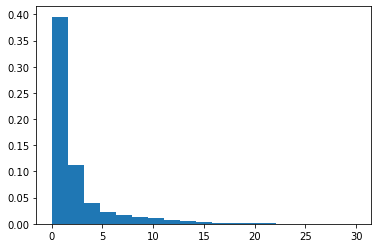

In [49]:
ix = bird_data.bird_name == "Eric"
speed = bird_data.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), normed=True)
plt.show()

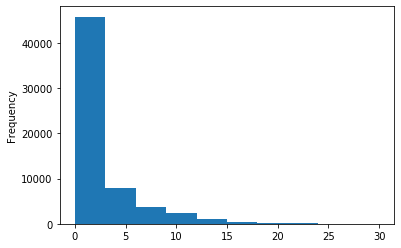

In [50]:
bird_data.speed_2d.plot(kind="hist", range=[0, 30]);

We often need to be able to deal with data that has timestamped events,
like our GPS data in this case study.
We also frequently need to be able to do our arithmetical operations with date
and timestamps, such as computing the time interval between two observations.
Python's datetime is made for dealing with these types of data.
One of the columns in our bird data set is timestamp.
It's called date time.
Let's look at a couple of the first entries.
In this case, we can see that we first have the date stamp and then
the timestamp.
The date is in the format of year, month, and day.
The entries in the data frame are all strings for date stamps.
If we'd like to operate on the time and date stamps,
such as finding out how much time has elapsed between any two timestamps,
we first need to convert them into so-called daytime object, that
supports our arithmetic operations.
Let's import the date time module first and explore it.
We'll import the datetime just as import datetime, so no abbreviated form.
To become more familiar with the library,
let's play with the function today.
It returns to us a datetime, datetime object,
that consists of the current date and timestamp.
Let's try running it again, but this time we
will assign the outcome or output to a variable.
So let's say time 1 is equal to this.
Then we wait a moment, and then we define time 2,
and we run the same method again.
We can now take time 2 and subtract time 1.
In this case, the output is what's called a time delta object.
It tells us how much time has elapsed between time 1 and time 2.
We can try rerunning time 2, and if we do the subtraction again,
as we'd expect, more time has passed.
In this case 30 seconds has passed between time 2 and time 1.
The resulting object is called date time time delta object.
If we'd like to compute how much time has passed between any two
observations in our data set, we first have
to convert the timestamps, now given as strings, to datetime objects.
Let's investigate the first timestamp in a bit more detail.
Here is the field following second is UTC,
which stands for coordinated universal time,
which is an offset that is expressed in hours.
In this case those entries are always 0, something you can check easily.
Since the offsets are all 0, we're going to ignore them moving forward.
Let's first pull out the first timestamp from our data set.
That's located at row 0, so bird data dot date time.
I'm going to call this date string.
To check these, you can type date str  and Python tells us that it's a string.
Let's first look at our date string.
In this case, we're interested in date string,
with the exception of the last three characters.
So doing the slicing gives us access to part of the string that we actually
care about.
Next we're going to use strip time function
to turn a string to a datetime object.
This is a somewhat complicated looking expression.
Let's look at it in a little bit more detail.
The first argument is the string, which we would
like to turn into a datetime object.
The second argument is also a string, but in this case
the latter string specifies the formatting of the first string.
Let's look at the former string in a little more detail.
For example, the first percentage uppercase
Y tells Python to expect a year, expressed in four digits.
The lowercase m tells Python to expect a month, expressed in two digits,
and so on.
If we look at the timestamp, the percentage capital H
tells Python to expect a 24 hour timestamp, expressing
the hours of the event.
Let's try running this line
and we can see that the output is a datetime object.
The year is 2013, month is 8 corresponding to August,
date is 15, and so on.
We can now use this function to go over every single row in our data set,
and create a new datetime object corresponding to every single row.
Here is some code that I wrote previously.
Let's look at the code and try to understand what it does.
I first set up an empty list, which is called timestamps.
I then loop over my bird data-- more specifically,
over every single row in my data set.
I'm using k as my loop variable.
For every single row, I extract the date time,
except I ignore the last three characters.
Once I've converted it to a datetime object
I append the resulting object to my timestamps list.
We can try running the code,
and we can just take a look at the first few of our timestamps.
In this case, everything looks good.
The next step for me is to construct a panda series object
and insert the timestamp from my Python list into that object.
I can then append the panda series as a new column in my bird data data frame.
Let's look at the code to do that briefly.
On the right-hand side, I first create a panda series object
from my timestamps list, and I explicitly specify the index
to match the index of my bird data.
On the left-hand side I then take my existing bird data.
I create a new column, which is called timestamp,
and I assign my panda series object that new timestamp column.
We can try running the code, and we can then look at the top couple of rows.
In this case, we can see that the timestamp
has been appended, or attached, to our table as the final column.
Let's now practice doing arithmetic with our timestamps.
I'm going to take my bird data timestamp, let's say from row 4.
I will subtract that.
I have my bird data timestamp and column 3.
In this case, we're getting a time delta object which is what we wanted.
What I'd like to do next is to create a list that
captures the amount of time that has elapsed
since the beginning of data collection.
To do this, we will need 2 lines of code.
First I will extract the timestamps for Eric,
and that object is going to be called times.
I then create my elapsed time object and I
construct that as a list comprehension.
Let's look at the list comprehension in a little more detail.
Let's first focus on the for loop for time in times.
What happens is that we're taking the time sequence and going over it
one object at a time.
These objects are called time-- that's our loop variable.
The element that gets appended the list is the following--
that's given at the beginning of the list comprehension--
time minus times at 0.
In other words, for each object in the list, time is going to be different--
whereas times square bracket 0 marks the beginning of the time measurement,
in this case, for Eric.
Let's run our two lines of code.
Now we can look at our elapsed time.
If you look at entry 0, we would expect that to be equal to 0.
If you look at the entry at say 1000, we know that in this case
12 days, 2 hours, and 2 minutes have passed
between observation located at 0, and observation located at index 1000.
But how can we measure time in certain units, like hours or days?
It turns out this is pretty easy to do.
We can take the object that we had before,
and we can simply divide that by a time delta object.
In this case, if I'd like to know how many days have passed,
I create a time delta object that's equal to 1 day.
I can accomplish that by using the key word days equals to 1.
In this case, I know that exactly 12.084 and so on days
have passed between observation 0 and 1000.
If I'd like to know this in hours, I can modify the time delta object.
I can set it to hours equals 1 and I know that approximately 290 hours
have passed between these two points.
We can now look at the data for Eric in a little bit more detail.
I'm going to make a plot where on the x-axis,
we have the number of the observation, and on the y-axis
we have the amount of time that has elapsed, measured in days.
I'm going to be using the same exact syntax as before.
I'm going to call this timeplot.pdf and we can look at the plot.
Looking at the plot, we see more or less a straight line.
If the times that passes between any two consecutive observations
was the exact same, for all observations,
we would see one perfectly straight line.
In this case we see a couple of jumps in our curve.
What this indicates to us is that there are observations
that are further apart from one another than other observations in the data
set.
This type of exploration of data really helps
you understand your data set very thoroughly.

In [56]:
bird_data["timestamps"] = [
    datetime.datetime.strptime(
        bird_data.date_time.iloc[i][:-3],
        "%Y-%m-%d %H:%M:%S"
    ) for i in range(len(bird_data))
]

In [58]:
times = bird_data.timestamps[bird_data.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

We often need to be able to deal with data that has timestamped events,
like our GPS data in this case study.
We also frequently need to be able to do our arithmetical operations with date
and timestamps, such as computing the time interval between two observations.
Python's datetime is made for dealing with these types of data.
One of the columns in our bird data set is timestamp.
It's called date time.
Let's look at a couple of the first entries.
In this case, we can see that we first have the date stamp and then
the timestamp.
The date is in the format of year, month, and day.
The entries in the data frame are all strings for date stamps.
If we'd like to operate on the time and date stamps,
such as finding out how much time has elapsed between any two timestamps,
we first need to convert them into so-called daytime object, that
supports our arithmetic operations.
Let's import the date time module first and explore it.
We'll import the datetime just as import datetime, so no abbreviated form.
To become more familiar with the library,
let's play with the function today.
It returns to us a datetime, datetime object,
that consists of the current date and timestamp.
Let's try running it again, but this time we
will assign the outcome or output to a variable.
So let's say time 1 is equal to this.
Then we wait a moment, and then we define time 2,
and we run the same method again.
We can now take time 2 and subtract time 1.
In this case, the output is what's called a time delta object.
It tells us how much time has elapsed between time 1 and time 2.
We can try rerunning time 2, and if we do the subtraction again,
as we'd expect, more time has passed.
In this case 30 seconds has passed between time 2 and time 1.
The resulting object is called date time time delta object.
If we'd like to compute how much time has passed between any two
observations in our data set, we first have
to convert the timestamps, now given as strings, to datetime objects.
Let's investigate the first timestamp in a bit more detail.
Here is the field following second is UTC,
which stands for coordinated universal time,
which is an offset that is expressed in hours.
In this case those entries are always 0, something you can check easily.
Since the offsets are all 0, we're going to ignore them moving forward.
Let's first pull out the first timestamp from our data set.
That's located at row 0, so bird data dot date time.
I'm going to call this date string.
To check these, you can type date str  and Python tells us that it's a string.
Let's first look at our date string.
In this case, we're interested in date string,
with the exception of the last three characters.
So doing the slicing gives us access to part of the string that we actually
care about.
Next we're going to use strip time function
to turn a string to a datetime object.
This is a somewhat complicated looking expression.
Let's look at it in a little bit more detail.
The first argument is the string, which we would
like to turn into a datetime object.
The second argument is also a string, but in this case
the latter string specifies the formatting of the first string.
Let's look at the former string in a little more detail.
For example, the first percentage uppercase
Y tells Python to expect a year, expressed in four digits.
The lowercase m tells Python to expect a month, expressed in two digits,
and so on.
If we look at the timestamp, the percentage capital H
tells Python to expect a 24 hour timestamp, expressing
the hours of the event.
Let's try running this line
and we can see that the output is a datetime object.
The year is 2013, month is 8 corresponding to August,
date is 15, and so on.
We can now use this function to go over every single row in our data set,
and create a new datetime object corresponding to every single row.
Here is some code that I wrote previously.
Let's look at the code and try to understand what it does.
I first set up an empty list, which is called timestamps.
I then loop over my bird data-- more specifically,
over every single row in my data set.
I'm using k as my loop variable.
For every single row, I extract the date time,
except I ignore the last three characters.
Once I've converted it to a datetime object
I append the resulting object to my timestamps list.
We can try running the code,
and we can just take a look at the first few of our timestamps.
In this case, everything looks good.
The next step for me is to construct a panda series object
and insert the timestamp from my Python list into that object.
I can then append the panda series as a new column in my bird data data frame.
Let's look at the code to do that briefly.
On the right-hand side, I first create a panda series object
from my timestamps list, and I explicitly specify the index
to match the index of my bird data.
On the left-hand side I then take my existing bird data.
I create a new column, which is called timestamp,
and I assign my panda series object that new timestamp column.
We can try running the code, and we can then look at the top couple of rows.
In this case, we can see that the timestamp
has been appended, or attached, to our table as the final column.
Let's now practice doing arithmetic with our timestamps.
I'm going to take my bird data timestamp, let's say from row 4.
I will subtract that.
I have my bird data timestamp and column 3.
In this case, we're getting a time delta object which is what we wanted.
What I'd like to do next is to create a list that
captures the amount of time that has elapsed
since the beginning of data collection.
To do this, we will need 2 lines of code.
First I will extract the timestamps for Eric,
and that object is going to be called times.
I then create my elapsed time object and I
construct that as a list comprehension.
Let's look at the list comprehension in a little more detail.
Let's first focus on the for loop for time in times.
What happens is that we're taking the time sequence and going over it
one object at a time.
These objects are called time-- that's our loop variable.
The element that gets appended the list is the following--
that's given at the beginning of the list comprehension--
time minus times at 0.
In other words, for each object in the list, time is going to be different--
whereas times square bracket 0 marks the beginning of the time measurement,
in this case, for Eric.
Let's run our two lines of code.
Now we can look at our elapsed time.
If you look at entry 0, we would expect that to be equal to 0.
If you look at the entry at say 1000, we know that in this case
12 days, 2 hours, and 2 minutes have passed
between observation located at 0, and observation located at index 1000.
But how can we measure time in certain units, like hours or days?
It turns out this is pretty easy to do.
We can take the object that we had before,
and we can simply divide that by a time delta object.
In this case, if I'd like to know how many days have passed,
I create a time delta object that's equal to 1 day.
I can accomplish that by using the key word days equals to 1.
In this case, I know that exactly 12.084 and so on days
have passed between observation 0 and 1000.
If I'd like to know this in hours, I can modify the time delta object.
I can set it to hours equals 1 and I know that approximately 290 hours
have passed between these two points.
We can now look at the data for Eric in a little bit more detail.
I'm going to make a plot where on the x-axis,
we have the number of the observation, and on the y-axis
we have the amount of time that has elapsed, measured in days.
I'm going to be using the same exact syntax as before.
I'm going to call this timeplot.pdf and we can look at the plot.
Looking at the plot, we see more or less a straight line.
If the times that passes between any two consecutive observations
was the exact same, for all observations,
we would see one perfectly straight line.
In this case we see a couple of jumps in our curve.
What this indicates to us is that there are observations
that are further apart from one another than other observations in the data
set.
This type of exploration of data really helps
you understand your data set very thoroughly.